In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

In [2]:
dataset = pd.read_excel('../data/boxScores.xlsx')

In [3]:
dataset = dataset[dataset['MIN'] != 0]
dataset = dataset.dropna(subset=['W/L'])
dataset.describe()

,GAME DATE,MIN,PTS,FGM,FGA,3PM,3PA,FTM,FTA,OREB,...,BLK,TOV,PF,+/-,FP,CLUSTER,Last3_FP_Avg,Last5_FP_Avg,Last7_FP_Avg,Season_FP_Avg
count,10705,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000,...,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000,8107.000000,10193.000000,10193.000000,10193.000000,10193.000000
mean,2024-11-25 04:28:53.918729472,22.449229,10.512471,3.834470,8.254461,1.255114,3.495563,1.588417,2.037926,1.008407,...,0.476880,1.311723,1.777861,-0.000654,21.564054,7.038732,21.651985,21.546023,21.463752,21.155991
min,2024-10-22 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-43.000000,-3.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2024-11-07 00:00:00,14.000000,3.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,-7.000000,9.600000,4.000000,11.666667,11.900000,11.885714,11.678261
50%,2024-11-24 00:00:00,23.000000,9.000000,3.000000,7.000000,1.000000,3.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,2.000000,0.000000,19.800000,7.000000,20.200000,20.160000,20.000000,19.816667
75%,2024-12-13 00:00:00,31.000000,16.000000,6.000000,12.000000,2.000000,5.000000,2.000000,3.000000,2.000000,...,1.000000,2.000000,3.000000,7.000000,31.200000,10.000000,30.066667,29.840000,29.614286,29.100000
max,2025-01-02 00:00:00,48.000000,60.000000,22.000000,39.000000,10.000000,20.000000,17.000000,26.000000,12.000000,...,10.000000,10.000000,6.000000,43.000000,98.300000,14.000000,80.500000,75.360000,72.200000,72.200000
std,NaN,10.849927,8.805024,3.232818,6.029224,1.533150,3.165969,2.240254,2.706884,1.341433,...,0.840655,1.453141,1.446213,11.377931,14.980795,3.947938,13.116790,12.702759,12.533319,12.253824


In [4]:
clusterdf = pd.read_excel('../data/clusteredPlayers.xlsx')

In [5]:
clusterdf = clusterdf.drop('Unnamed: 0', axis=1)
clusterdf.head()

,Player,Cluster
0,Bennedict Mathurin,5
1,Clint Capela,0
2,De'Aaron Fox,7
3,Jarace Walker,12
4,Jaylen Wells,5


In [6]:
clusterDict = {}

In [7]:
# Map the 'Cluster' column from clusterdf to the dataset based on 'Player'
clusterDict = clusterdf.set_index('Player')['Cluster'].to_dict()

# Map the 'CLUSTER' column in the dataset
dataset['CLUSTER'] = dataset['PLAYER'].map(clusterDict)

In [8]:
# Remove players without a cluster
dataset = dataset.dropna(subset=['CLUSTER'])
dataset.sort_values(by=['GAME DATE'], ascending = [False], inplace=True)

In [9]:
dataset.describe()


,GAME DATE,MIN,PTS,FGM,FGA,3PM,3PA,FTM,FTA,OREB,...,BLK,TOV,PF,+/-,FP,CLUSTER,Last3_FP_Avg,Last5_FP_Avg,Last7_FP_Avg,Season_FP_Avg
count,8107,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,...,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,7807.000000,7807.000000,7807.000000,7807.000000
mean,2024-11-25 05:54:32.283211776,26.431972,12.730480,4.633650,9.931664,1.523992,4.201801,1.939188,2.463673,1.149007,...,0.549525,1.563217,2.039102,0.179351,25.767053,7.038732,25.706917,25.597963,25.520019,25.200736
min,2024-10-22 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-43.000000,-2.800000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2024-11-06 00:00:00,20.000000,6.000000,2.000000,6.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,-8.000000,15.200000,4.000000,16.966667,17.150000,17.250000,17.074457
50%,2024-11-24 00:00:00,27.000000,11.000000,4.000000,9.000000,1.000000,4.000000,1.000000,2.000000,1.000000,...,0.000000,1.000000,2.000000,0.000000,24.400000,7.000000,24.200000,24.180000,24.071429,23.707143
75%,2024-12-14 00:00:00,33.000000,18.000000,7.000000,13.000000,2.000000,6.000000,3.000000,4.000000,2.000000,...,1.000000,2.000000,3.000000,8.000000,34.600000,10.000000,33.083333,32.600000,32.475714,31.946018
max,2025-01-02 00:00:00,48.000000,60.000000,22.000000,39.000000,10.000000,20.000000,17.000000,26.000000,12.000000,...,10.000000,10.000000,6.000000,43.000000,98.300000,14.000000,80.500000,75.360000,72.200000,72.200000
std,NaN,8.547116,8.714883,3.206364,5.781149,1.612623,3.211053,2.392959,2.872014,1.402827,...,0.895121,1.520578,1.427870,12.382730,14.159065,3.947938,11.911910,11.398950,11.181366,10.844535


In [10]:
featureNames = ['Last3_FP_Avg', 'Last5_FP_Avg', 'Last7_FP_Avg', 'Season_FP_Avg', 'CLUSTER']
labelName = ['FP']
dfFeatures = dataset[featureNames]
dfLabels = dataset[labelName]
# Ensures Cluster is a categorical variable 
dfFeatures = pd.get_dummies(dfFeatures, columns=['CLUSTER'], drop_first=False)

In [11]:
labels = np.array(dfLabels)
features = np.array(dfFeatures)

In [12]:
dataset = dataset[['PLAYER', 'GAME DATE', 'FP', 'Last3_FP_Avg', 'Last5_FP_Avg', 'Last7_FP_Avg', 'Season_FP_Avg', 'CLUSTER']]
players = dataset['PLAYER']
gameDates = dataset['GAME DATE']

In [13]:
print(f"Initial dataset shape: {dataset.shape}")
train, test, trainLabels, testLabels, trainPlayers, testPlayers, trainDates, testDates= train_test_split(features, labels, players, gameDates, test_size=0.25, random_state=30)
testPlayers = testPlayers.reset_index(drop=True)
testDates = testDates.reset_index(drop=True)
print(f"Dataset shape after dropna: {dataset.shape}")

Initial dataset shape: (8107, 8)
Dataset shape after dropna: (8107, 8)


In [14]:
import pickle
rf = RandomForestRegressor(
    random_state=4,
)
rf.fit(train, trainLabels)

with open("../models/RFCluster.sav", 'wb') as f:
    pickle.dump(rf, f)

c:\Users\Ian Bracken\Desktop\WebDev\nba-prediction-model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [15]:
train_predictions = rf.predict(train)
predictions = rf.predict(test)


In [16]:
# Create a mapping from one-hot encoded columns back to cluster numbers
cluster_columns = [col for col in dfFeatures.columns if col.startswith('CLUSTER_')]
reverse_cluster_map = {i: col.split('_')[-1] for i, col in enumerate(cluster_columns, start=1)}

In [17]:
feature_columns = dfFeatures.columns
df = pd.DataFrame(test, columns = feature_columns)
# Add back a 'CLUSTER' column to your DataFrame after predictions
df['CLUSTER'] = df[cluster_columns].idxmax(axis=1)  # Get the column with the highest value (1 in this case)
df['CLUSTER'] = df['CLUSTER'].map(lambda x: float(x.split('_')[-1]))  # Map back to the original cluster numbers

# Drop the one-hot encoded columns if no longer needed
df = df.drop(columns=cluster_columns)
df['PLAYER'] = testPlayers
df['GAME DATE'] = testDates
df['Actual'] = testLabels
df['Predicted'] = predictions
df['Error'] = abs(df['Actual'] - df['Predicted'])
df = df[['PLAYER'] + [col for col in df.columns if col != 'PLAYER']]

In [18]:
df.describe()

,CLUSTER,GAME DATE,Actual,Predicted,Error
count,2027.000000,2027,2027.000000,2027.000000,2027.000000
mean,7.105081,2024-11-25 07:19:44.607794688,25.748397,26.181104,8.358324
min,0.000000,2024-10-22 00:00:00,-2.500000,4.363000,0.011000
25%,4.000000,2024-11-06 00:00:00,14.900000,18.574917,3.241500
50%,7.000000,2024-11-24 00:00:00,24.200000,24.181000,7.008000
75%,11.000000,2024-12-14 00:00:00,34.400000,32.331000,11.972500
max,14.000000,2025-01-02 00:00:00,85.200000,71.428000,41.689000
std,3.969070,NaN,14.030407,10.441843,6.388799


In [19]:
df.head()

,PLAYER,Last3_FP_Avg,Last5_FP_Avg,Last7_FP_Avg,Season_FP_Avg,CLUSTER,GAME DATE,Actual,Predicted,Error
0,Amir Coffey,19.1,19.1,19.1,19.1,5.0,2024-10-26,9.9,30.736667,20.836667
1,Tristan da Silva,19.4,18.84,17.742857,15.617241,4.0,2024-12-29,39.7,19.358000,20.342000
2,Deni Avdija,32.433333,31.92,29.942857,26.138889,11.0,2024-11-27,36.5,30.646000,5.854000
3,LaMelo Ball,41.933333,43.86,46.785714,44.806667,3.0,2024-11-23,70.0,46.968000,23.032000
4,Isaiah Collier,15.8,15.86,13.3,13.3,10.0,2024-11-19,14.2,18.707000,4.507000


In [20]:
pd.DataFrame.to_excel(df, '../data/testPlayerPredictions.xlsx')

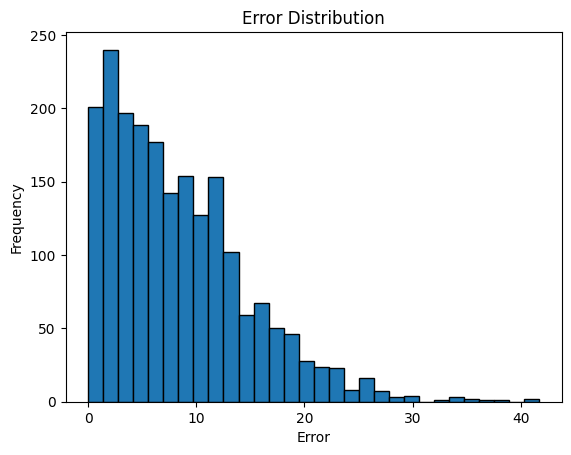

In [21]:
import matplotlib.pyplot as plt

plt.hist(df['Error'], bins=30, edgecolor='k')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()

In [22]:
# Identfy unique list of cluster to loop over
clusterdf.head()

,Player,Cluster
0,Bennedict Mathurin,5
1,Clint Capela,0
2,De'Aaron Fox,7
3,Jarace Walker,12
4,Jaylen Wells,5


In [23]:
clusterList = clusterdf['Cluster'].tolist()

In [24]:
uniqueClusterList = list(set(clusterList))
uniqueClusterList

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [25]:
# ClusterError = 0
# for cluster in uniqueClusterList:
#     clusterdf = dataset[dataset['CLUSTER'] == cluster]
#     dfFeatures = clusterdf[['Last3_FP_Avg', 'Last5_FP_Avg', 'Last7_FP_Avg', 'Season_FP_Avg']]
#     dfLabels = clusterdf[['FP']]

#     labels = np.array(dfLabels).ravel()
#     features = np.array(dfFeatures)

#     train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=4)

#     reg = RandomForestRegressor(random_state=4)
#     reg.fit(train, train_labels)

#     train_predictions = reg.predict(train)
#     predictions = reg.predict(test)

#     df0 = pd.DataFrame(test, columns = ['Last3_FP_Avg', 'Last5_FP_Avg', 'Last7_FP_Avg', 'Season_FP_Avg'])
#     df0['Actual'] = test_labels
#     df0['Predicted'] = predictions
#     df0['Error'] = abs(df0['Actual'] - df0['Predicted'])
#     ClusterError += df0['Error'].mean()

#     print(f"Cluster {cluster} average error is roughly {df0['Error'].mean()}")
# avgClusterError = ClusterError/len(uniqueClusterList)
# print(f"Average error across clusters is: {avgClusterError}")